# Mask R-CNN - Train on Shapes Dataset


This notebook shows how to train Mask R-CNN on your own dataset. To keep things simple we use a synthetic dataset of shapes (squares, triangles, and circles) which enables fast training. You'd still need a GPU, though, because the network backbone is a Resnet101, which would be too slow to train on a CPU. On a GPU, you can start to get okay-ish results in a few minutes, and good results in less than an hour.

The code of the *Shapes* dataset is included below. It generates images on the fly, so it doesn't require downloading any data. And it can generate images of any size, so we pick a small image size to train faster. 

In [9]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import skimage

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

from samples.cells import cells


In [10]:
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

## Configurations

In [11]:
config = cells.CellConfig()

CELL_DIR = os.path.join(ROOT_DIR, "datasets\\cells\\")


## Notebook Preferences

In [12]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Dataset

Create a synthetic dataset

Extend the Dataset class and add a method to load the shapes dataset, `load_shapes()`, and override the following methods:

* load_image()
* load_mask()
* image_reference()

In [13]:
# Training dataset
dataset_train = cells.CellDataset()
filename="mcf7_041422_v1"
dataset_train.load_cell(CELL_DIR, filename)

# Must call before using the dataset/
dataset_train.prepare()
# Validation dataset
dataset_val = cells.CellDataset()
#dataset_val.load_shapes(50, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
dataset_train.load_cell(CELL_DIR, filename)
dataset_val.prepare()


## Training

Train in two stages:
1. Only the heads. Here we're freezing all the backbone layers and training only the randomly initialized layers (i.e. the ones that we didn't use pre-trained weights from MS COCO). To train only the head layers, pass `layers='heads'` to the `train()` function.

2. Fine-tune all layers. For this simple example it's not necessary, but we're including it to show the process. Simply pass `layers="all` to train all layers.

In [14]:
# Load and display random samples
for image_id in dataset_train.image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
   # visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)
for image_id in dataset_val.image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
print(len(dataset_train.image_ids))

214


In [15]:
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

tracking <tf.Variable 'Variable_1:0' shape=(1, 261888, 4) dtype=float32_ref> anchors
w
k
w
k
w
k
w
k
w
k
w
k
Tensor("ROI_1/packed_2:0", shape=(1, ?, 4), dtype=float32)
Tensor("input_gt_class_ids_1:0", shape=(?, ?), dtype=int32)
Tensor("lambda_5/truediv:0", shape=(?, ?, 4), dtype=float32)
Tensor("input_gt_masks_1:0", shape=(?, 56, 56, ?), dtype=bool)
works
Tensor("ROI_1/packed_2:0", shape=(1, ?, 4), dtype=float32)
Tensor("input_gt_class_ids_1:0", shape=(?, ?), dtype=int32)
Tensor("lambda_5/truediv:0", shape=(?, ?, 4), dtype=float32)
Tensor("input_gt_masks_1:0", shape=(?, 56, 56, ?), dtype=bool)
w
1
2
3
5
6
Tensor("proposal_targets_1/GatherV2_4:0", shape=(?, 4), dtype=float32)
Tensor("proposal_targets_1/GatherV2_7:0", shape=(?, 4), dtype=float32)
6.5
7
8
k
works
this


In [16]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=1, 
            layers='heads')

train
test

Starting at epoch 0. LR=0.001

Checkpoint Path: c:\Users\natas\OneDrive\Desktop\Parekh\Senior Project\Mask_RCNN\logs\cell20220719T1837\mask_rcnn_cell_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mr

c:\Users\natas\anaconda3\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
c:\Users\natas\anaconda3\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
c:\Users\natas\anaconda3\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


KeyboardInterrupt: 

In [ ]:
# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=1, 
            layers="all")


Starting at epoch 2. LR=0.0001

Checkpoint Path: c:\Users\natas\OneDrive\Desktop\Parekh\Senior Project\Mask_RCNN\logs\shapes20220420T0405\mask_rcnn_shapes_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)

C:\Users\natas\anaconda3\envs\arduino\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:1240: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


In [ ]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
# model_path = os.path.join(MODEL_DIR, "mask_rcnn_shapes.h5")
# model.keras_model.save_weights(model_path)

## Detection

In [ ]:
class InferenceConfig(ShapesConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Instructions for updating:
box_ind is deprecated, use box_indices instead
Instructions for updating:
Use fn_output_signature instead
Instructions for updating:
Use `tf.cast` instead.
Loading weights from  c:\Users\natas\OneDrive\Desktop\Parekh\Senior Project\Mask_RCNN\logs\shapes20220420T0405\mask_rcnn_shapes_0002.h5
Re-starting from epoch 2


original_image           shape: (704, 704, 3)         min:   24.00000  max:  229.00000  uint8
image_meta               shape: (16,)                 min:    0.00000  max:  704.00000  int32
gt_class_id              shape: (3,)                  min:    2.00000  max:    3.00000  int32
gt_bbox                  shape: (3, 4)                min:   44.00000  max:  704.00000  int32
gt_mask                  shape: (704, 704, 3)         min:    0.00000  max:    1.00000  bool


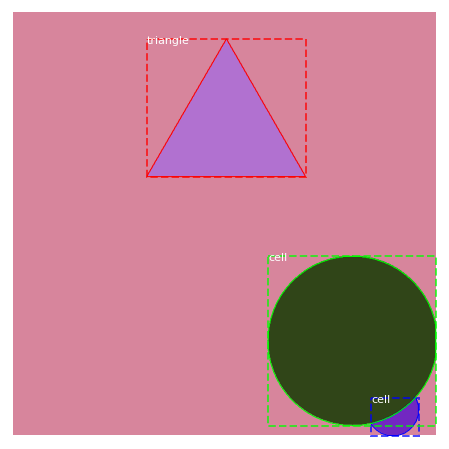

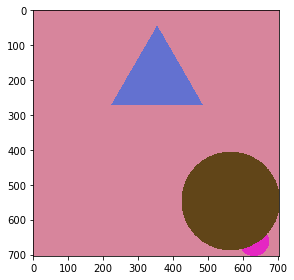

-1

In [ ]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))
skimage.io.imshow(original_image)
plt.show()
#image = skimage.io.imread("C:\\Users\\natas\\OneDrive\\Desktop\\Parekh\\Senior Project\\mcf7_041422_v1\\images\\P23_V5_0214_Scan4_cell45.tif")
# Set threshold and maxValue
thresh = 120
maxValue = 255

# Basic threshold example
imgray = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)

th, dst = cv2.threshold(imgray, thresh, maxValue, cv2.THRESH_BINARY);

# Find Contours 
countours,hierarchy=cv2.findContours(dst,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Draw Contour
cv2.drawContours(dst,countours,-1,(255,255,255),3)
# Visualize results
cv2.imshow("Contour",dst)
cv2.waitKey(0)

<Figure size 432x288 with 0 Axes>

Processing 1 images
image                    shape: (181, 638, 1)         min:    0.00000  max:   59.00000  uint8
molded_images            shape: (1, 704, 704, 3)      min: -123.70000  max:  -44.90000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  704.00000  int32
anchors                  shape: (1, 123783, 4)        min:   -0.12875  max:    1.03771  float32
(1, 704, 704, 3)


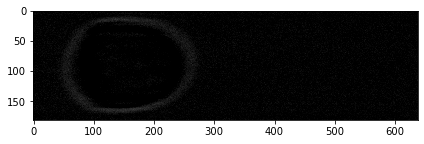

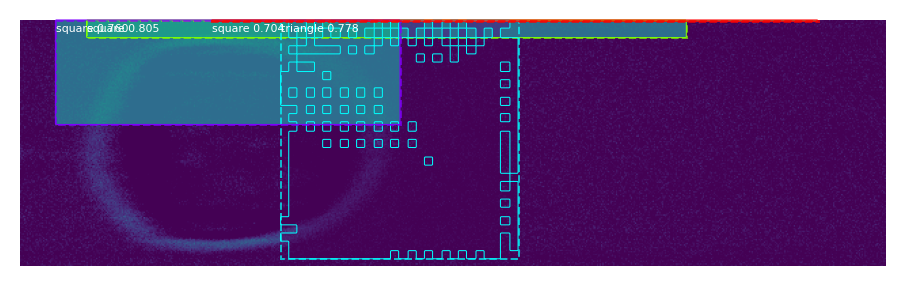

-1

In [ ]:
plt.figure()
image = skimage.io.imread("C:\\Users\\natas\\OneDrive\\Desktop\\Parekh\\Senior Project\\mcf7_041422_v1\\images\\P23_V5_0214_Scan4_cell45.tif")
#image = np.expand_dims(image, axis=2)
image.resize(181,638,1)
plt.show()
skimage.io.imshow(image)
# Run detection
results = model.detect([image], verbose=1)
r = results[0]

visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_train.class_names, r['scores'])
image = skimage.io.imread("C:\\Users\\natas\\OneDrive\\Desktop\\Parekh\\Senior Project\\mcf7_041422_v1\\images\\P23_V5_0214_Scan4_cell45.tif")
# Set threshold and maxValue
thresh = 1
maxValue = 10

# Basic threshold example
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_BINARY);

# Find Contours 
countours,hierarchy=cv2.findContours(dst,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Draw Contour
cv2.drawContours(dst,countours,-1,(255,255,255),3)
# Visualize results
cv2.imshow("Contour",dst)
cv2.waitKey(0)


Processing 1 images
image                    shape: (704, 704, 3)         min:   59.00000  max:  244.00000  uint8
molded_images            shape: (1, 704, 704, 3)      min:  -60.70000  max:  126.20000  float64
image_metas              shape: (1, 16)               min:    0.00000  max:  704.00000  int32
anchors                  shape: (1, 123783, 4)        min:   -0.12875  max:    1.03771  float32
(1, 704, 704, 3)


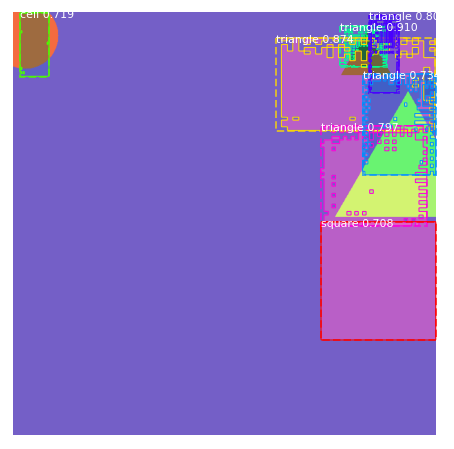

In [ ]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())

## Evaluation

In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
image_ids = np.random.choice(dataset_val.image_ids, 10)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

(1, 704, 704, 3)
(1, 704, 704, 3)
(1, 704, 704, 3)
(1, 704, 704, 3)
(1, 704, 704, 3)
(1, 704, 704, 3)
(1, 704, 704, 3)
(1, 704, 704, 3)
(1, 704, 704, 3)
(1, 704, 704, 3)
mAP:  0.2930555582046509
